In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os


main_directory = Path.cwd().parent.as_posix()

In [12]:
df = pd.read_csv(f"{main_directory}/databases/zoopla_data.csv")
df

,type,price,station,beds,baths,receptions,post_code,location,avg_sold_price_12months,avg_type
0,flat,110000.0,1.3,2,1.0,1.0,M8,manchester,162788,101576.0
1,flat,115000.0,1.4,2,1.0,1.0,M8,manchester,162788,101576.0
2,flat,170000.0,0.7,2,1.0,1.0,M8,manchester,162788,101576.0
3,semi-detached,180000.0,1.4,3,1.0,1.0,M8,manchester,162788,208116.0
4,semi-detached,190000.0,1.9,3,1.0,0.0,M8,manchester,162788,208116.0
...,...,...,...,...,...,...,...,...,...,...
6382,detached,600000.0,4.1,4,0.0,0.0,CA4,cumbria,272071,334295.0
6383,detached,375000.0,1.7,4,1.0,1.0,CA4,carlisle,272071,334295.0
6384,detached,447500.0,0.4,4,0.0,0.0,CA4,carlisle,272071,334295.0
6385,detached,350000.0,1.4,5,0.0,0.0,CA4,carlisle,272071,334295.0


In [13]:
df['type'].value_counts()

flat             2919
semi-detached    1274
detached         1134
terraced         1060
Name: type, dtype: int64

In [14]:
df['location'].value_counts()

manchester       1300
liverpool         898
salford           471
preston           356
merseyside        232
                 ... 
preesall            1
stalmine            1
newsholme           1
ribblevalley        1
blundellsands       1
Name: location, Length: 287, dtype: int64

In [15]:
df.isnull().sum()

type                         0
price                        0
station                    998
beds                         0
baths                        0
receptions                   0
post_code                    0
location                    12
avg_sold_price_12months      0
avg_type                     0
dtype: int64

In [16]:
df.describe()

,price,station,beds,baths,receptions,avg_sold_price_12months,avg_type
count,6.387000e+03,5389.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000
mean,2.577418e+05,0.993450,2.614530,1.380930,1.223423,217545.606858,206980.408016
std,1.639181e+05,1.163475,1.074064,0.770604,0.886635,70896.693207,95910.772093
min,1.050000e+05,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.569950e+05,0.400000,2.000000,1.000000,1.000000,179201.000000,149740.000000
50%,2.150000e+05,0.700000,3.000000,1.000000,1.000000,203762.000000,182574.000000
75%,3.000000e+05,1.100000,3.000000,2.000000,2.000000,250562.000000,231174.000000
max,2.750000e+06,9.600000,5.000000,5.000000,5.000000,557366.000000,801666.000000


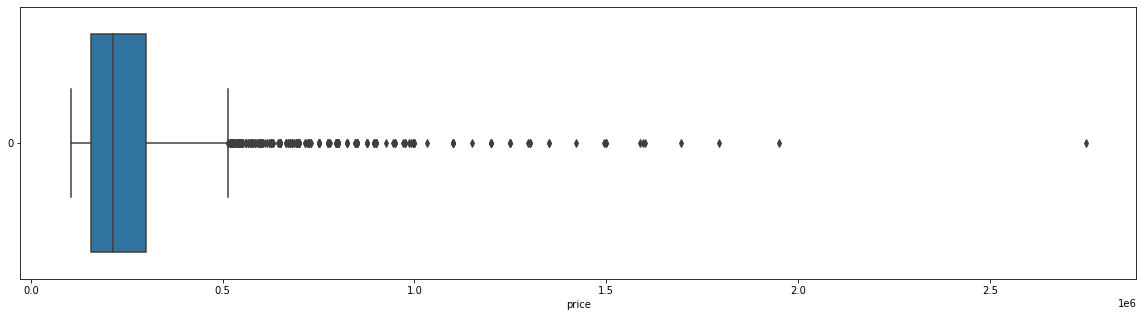

In [17]:
plt.figure(figsize = (20, 5))
sns.boxplot(data = df['price'],
            orient = 'h')
plt.xlabel("price")
plt.show()

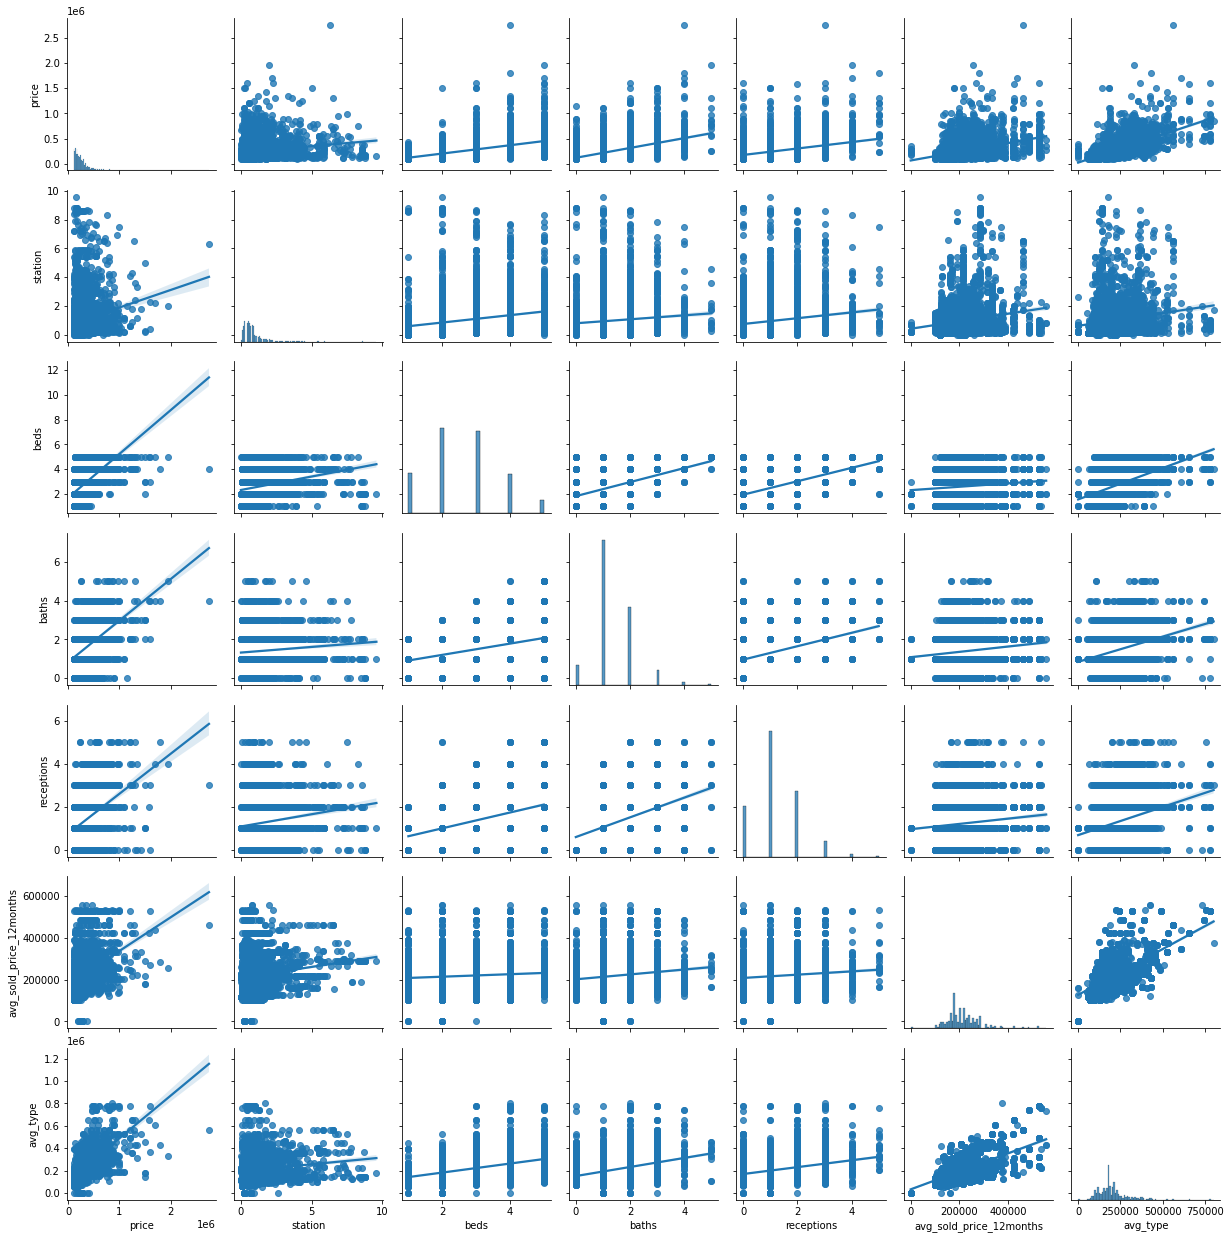

In [18]:
sns.pairplot(df, kind='reg')

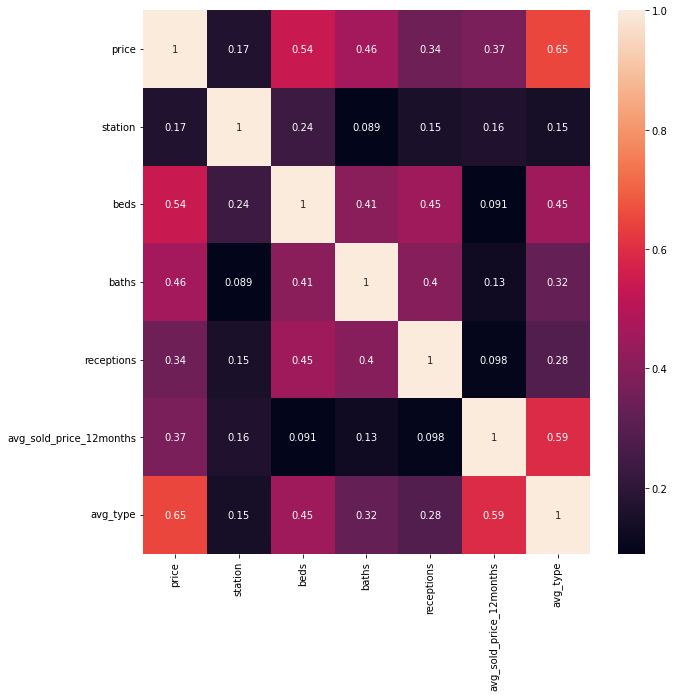

In [19]:
import numpy as np


plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True)

plt.show()

In [20]:
df.isnull().sum()

type                         0
price                        0
station                    998
beds                         0
baths                        0
receptions                   0
post_code                    0
location                    12
avg_sold_price_12months      0
avg_type                     0
dtype: int64